# Australian  Beverage Company Retail Forecasting

## Business Understanding

### Overview

### Problem Statement

### Objective

## Data Understanding


Product: This column likely refers to the unique identifier or code for a particular product.

Date: This column indicates the date of sale for the product.

Sales: This column shows the total sales revenue generated by the product on the given date.

Price Discount (%): This column indicates the percentage discount that was applied to the product's price at the time of sale.

In-Store Promo: This column likely indicates whether there was a promotion or discount offered specifically for in-store purchases.

Catalogue Promo: This column likely indicates whether there was a promotion or discount offered through a catalogue or other print or digital media.

Store End Promo: This column likely indicates whether there was a promotion or discount offered specifically at the end of a store's promotional period.

Google_Mobility: This column may be a measure of the relative mobility or foot traffic in the area surrounding the store where the product was sold, based on Google's location data.

Covid_Flag: This column likely indicates whether there were any COVID-related restrictions or concerns in effect on the date of sale.

V_DAY: This column likely indicates whether the date of sale was close to or on Valentine's Day.

EASTER: This column likely indicates whether the date of sale was close to or on Easter.

CHRISTMAS: This column likely indicates whether the date of sale was close to or on Christmas.

In [1]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('forecasting_case_study.xlsx - Sheet1.csv')
#preview the first five rows of the data
df.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,SKU1,2/5/2017,27750,0%,0,0,0,0.0,0,0,0,0
1,SKU1,2/12/2017,29023,0%,1,0,1,0.0,0,1,0,0
2,SKU1,2/19/2017,45630,17%,0,0,0,0.0,0,0,0,0
3,SKU1,2/26/2017,26789,0%,1,0,1,0.0,0,0,0,0
4,SKU1,3/5/2017,41999,17%,0,0,0,0.0,0,0,0,0


* The Price Discount (%) column should have the percentage sign removed in the data

In [3]:
# preview the last five rows of the data
df.tail()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
1213,SKU6,10/18/2020,96619,54%,0,1,0,-7.56,1,0,0,0
1214,SKU6,10/25/2020,115798,52%,0,1,0,-8.39,1,0,0,0
1215,SKU6,11/1/2020,152186,54%,1,0,1,-7.43,1,0,0,0
1216,SKU6,11/8/2020,26445,44%,1,0,1,-5.95,1,0,0,0
1217,SKU6,11/15/2020,26414,44%,0,0,0,-7.20,1,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product             1218 non-null   object 
 1   date                1218 non-null   object 
 2   Sales               1218 non-null   int64  
 3   Price Discount (%)  1218 non-null   object 
 4   In-Store Promo      1218 non-null   int64  
 5   Catalogue Promo     1218 non-null   int64  
 6   Store End Promo     1218 non-null   int64  
 7   Google_Mobility     1218 non-null   float64
 8   Covid_Flag          1218 non-null   int64  
 9   V_DAY               1218 non-null   int64  
 10  EASTER              1218 non-null   int64  
 11  CHRISTMAS           1218 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 114.3+ KB


* The data has 12 columns and 1218 rows
* The datatype for the columns include 3 objects, 8 integers and one float
* The date column is of object datatype it needs to be transformed to datetime
* The Easter,Christmas,Covid_Flag,V_day,In-Store Promo,Catalogue Promo,Store End Promo need to be changed from integers to boolean
* The V_Day column should be renamed to Valentines 
* The Price Discount column should be converted from object to integer after removing the percentage sign in the data

In [5]:
df.describe()

,Sales,In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,30294.678982,0.472085,0.212644,0.348933,-2.377406,0.226601,0.019704,0.019704,0.018883
std,35032.527297,0.499425,0.409346,0.476828,5.806291,0.418804,0.139040,0.139040,0.136169
min,0.000000,0.000000,0.000000,0.000000,-28.490000,0.000000,0.000000,0.000000,0.000000
25%,7212.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19742.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40282.250000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,288322.000000,1.000000,1.000000,1.000000,3.900000,1.000000,1.000000,1.000000,1.000000


* The highest sales for a product to a supermakert is 288322
* Google moblity has the lowest as -28.49 and highest of 3.9


In [6]:
# finding the number of unique values for products
print('unique values','\n', df['Product'].value_counts())

unique values 
 SKU3    204
SKU5    204
SKU4    204
SKU1    204
SKU2    204
SKU6    198
Name: Product, dtype: int64


* In terms of product class there is no class imbalance

## Data Preparation

##### Data preprocessing

In [7]:
# renaming the V_Day column to Valentines
df.rename(columns={'V_DAY':'VALENTINES'},inplace=True)

In [8]:
# removing the percentage sign in the price discount column
df['Price Discount (%)']=df['Price Discount (%)'].map(lambda x: x.strip('%'))

In [9]:
# checking to see whether the % signshave been removed
df.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,VALENTINES,EASTER,CHRISTMAS
0,SKU1,2/5/2017,27750,0,0,0,0,0.0,0,0,0,0
1,SKU1,2/12/2017,29023,0,1,0,1,0.0,0,1,0,0
2,SKU1,2/19/2017,45630,17,0,0,0,0.0,0,0,0,0
3,SKU1,2/26/2017,26789,0,1,0,1,0.0,0,0,0,0
4,SKU1,3/5/2017,41999,17,0,0,0,0.0,0,0,0,0


This will involve checking for :
* Completeness - Checking for missing values in the data
* Uniformity - 
* Consistency - Involves checking for duplicated entries in the data
* Validity - Involves checking for outliers in the data

Incase any of these are not met we will do the necessary process to make the data complete,valid,uniform and consistent

#### Checking for missing values

In [10]:
### check whether they are missing values
df.isna().sum()

Product               0
date                  0
Sales                 0
Price Discount (%)    0
In-Store Promo        0
Catalogue Promo       0
Store End Promo       0
Google_Mobility       0
Covid_Flag            0
VALENTINES            0
EASTER                0
CHRISTMAS             0
dtype: int64

There are no missing values in the data

#### Checking for consistency

In [11]:
# this invovles checking for duplicates
df.duplicated().sum()

0

There are no duplicates in the data

#### Checking for uniformity

In [12]:
# converting date columns to datetime
df['date']=pd.to_datetime(df['date'])


In [13]:
# converting the integers to boolean
list1=['Catalogue Promo','In-Store Promo','Store End Promo','CHRISTMAS','VALENTINES','EASTER','Covid_Flag']
for all in list1:
    df[all]=df[all].astype('boolean')
# converting the price discount column to an integer
df['Price Discount (%)']=df['Price Discount (%)'].astype(int)
# checking to see whether they are boolean
df.dtypes

Product                       object
date                  datetime64[ns]
Sales                          int64
Price Discount (%)             int32
In-Store Promo               boolean
Catalogue Promo              boolean
Store End Promo              boolean
Google_Mobility              float64
Covid_Flag                   boolean
VALENTINES                   boolean
EASTER                       boolean
CHRISTMAS                    boolean
dtype: object

#### Checking for validity

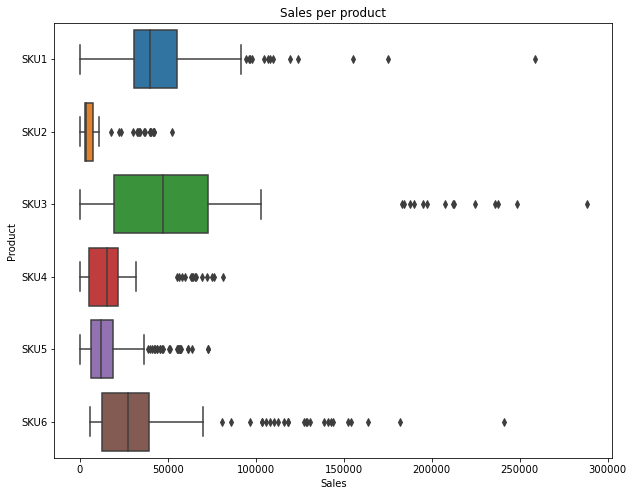

In [14]:
# cheking the distribution of sales for each product
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='Sales',y='Product')
plt.title('Sales per product')
plt.show()

The outliers seem genuine due to seasonality trend so they will remain in the data 

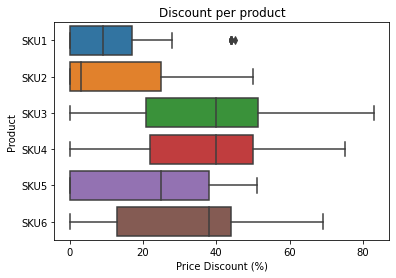

In [15]:
# checking for the distribution of discount per product
sns.boxplot(data=df,x='Price Discount (%)',y='Product')
plt.title('Discount per product')
plt.show()

The outliers seem genuine so they will remain in the data

#### Feature Engineering

* We will create new columns to help build the accuracy for the model
* The new columns will include:

Month

Year

Day of the week
 
Australian Day

Anzac Day

Seasons

In [16]:
# creating the month column
df['month']=df['date'].apply(lambda x: x.strftime('%b'))
# creating the year column
df['year']=df['date'].apply(lambda x: x.strftime('%Y'))
# creating the day of the week column
df['day']=df['date'].apply(lambda x: x.strftime('%A'))

In [17]:
# preview the data
df.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,VALENTINES,EASTER,CHRISTMAS,month,year,day
0,SKU1,2017-02-05,27750,0,False,False,False,0.0,False,False,False,False,Feb,2017,Sunday
1,SKU1,2017-02-12,29023,0,True,False,True,0.0,False,True,False,False,Feb,2017,Sunday
2,SKU1,2017-02-19,45630,17,False,False,False,0.0,False,False,False,False,Feb,2017,Sunday
3,SKU1,2017-02-26,26789,0,True,False,True,0.0,False,False,False,False,Feb,2017,Sunday
4,SKU1,2017-03-05,41999,17,False,False,False,0.0,False,False,False,False,Mar,2017,Sunday


In [18]:
# Knowing start time and end time for the data
from dateutil.relativedelta import relativedelta
df.sort_values(by='date',inplace=True)
StartDate=df['date'].iloc[0]
EndDate=df['date'].iloc[-1]
Duration_taken_in_days=EndDate - StartDate
difference=relativedelta(EndDate,StartDate)
# preview the data to know 
print(f'The date starts from {StartDate} to {EndDate}')
print('The duration for the sales is',difference.years,'years',difference.months,'months',difference.days,'days')

The date starts from 2017-02-05 00:00:00 to 2020-12-27 00:00:00
The duration for the sales is 3 years 10 months 22 days


In [19]:
df.tail()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,VALENTINES,EASTER,CHRISTMAS,month,year,day
611,SKU3,2020-12-27,0,74,True,False,True,-6.95,True,False,False,False,Dec,2020,Sunday
815,SKU4,2020-12-27,0,62,True,False,True,-6.95,True,False,False,False,Dec,2020,Sunday
407,SKU2,2020-12-27,0,21,False,False,False,-6.95,True,False,False,False,Dec,2020,Sunday
1019,SKU5,2020-12-27,0,23,False,False,False,-6.95,True,False,False,False,Dec,2020,Sunday
203,SKU1,2020-12-27,0,15,True,False,False,-6.95,True,False,False,False,Dec,2020,Sunday


In [20]:
df.tail()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,VALENTINES,EASTER,CHRISTMAS,month,year,day
611,SKU3,2020-12-27,0,74,True,False,True,-6.95,True,False,False,False,Dec,2020,Sunday
815,SKU4,2020-12-27,0,62,True,False,True,-6.95,True,False,False,False,Dec,2020,Sunday
407,SKU2,2020-12-27,0,21,False,False,False,-6.95,True,False,False,False,Dec,2020,Sunday
1019,SKU5,2020-12-27,0,23,False,False,False,-6.95,True,False,False,False,Dec,2020,Sunday
203,SKU1,2020-12-27,0,15,True,False,False,-6.95,True,False,False,False,Dec,2020,Sunday


In [21]:
# can we create a season column for all the seasons
# lets create a dictionary containing each month and its season
season={
    'January':'Summer',
    'February':'Summer',
    'March':'Autumn',
    'April': 'Autumn',
    'May':'Autumn',
    'June':'Winter',
    'July':'Winter',
    'August':'Winter',
    'September':'Spring',
    'October':'Spring',
    'November':'Spring',
    'December':'Summer'
}
df['Seasons']=df['date'].apply(lambda x: x.strftime('%B')).map(season)

In [22]:
df.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,VALENTINES,EASTER,CHRISTMAS,month,year,day,Seasons
0,SKU1,2017-02-05,27750,0,False,False,False,0.0,False,False,False,False,Feb,2017,Sunday,Summer
612,SKU4,2017-02-05,12835,30,False,True,True,0.0,False,False,False,False,Feb,2017,Sunday,Summer
408,SKU3,2017-02-05,39767,30,False,True,True,0.0,False,False,False,False,Feb,2017,Sunday,Summer
1020,SKU6,2017-02-05,32138,28,False,False,False,0.0,False,False,False,False,Feb,2017,Sunday,Summer
816,SKU5,2017-02-05,5229,0,False,False,False,0.0,False,False,False,False,Feb,2017,Sunday,Summer


In [23]:
# lets create the column for most popular holidays in Australia according to  McCrindle Research Pty Ltd 
# Austrialia day
df['Australia_day'] =  df['date'].apply(lambda x: x.strftime('%m-%d')== '01-26')
# Anzac day
df['Anzac_day'] = df['date'].apply(lambda x: x.strftime('%m-%d')== '04-25')

In [24]:
df.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,VALENTINES,EASTER,CHRISTMAS,month,year,day,Seasons,Australia_day,Anzac_day
0,SKU1,2017-02-05,27750,0,False,False,False,0.0,False,False,False,False,Feb,2017,Sunday,Summer,False,False
612,SKU4,2017-02-05,12835,30,False,True,True,0.0,False,False,False,False,Feb,2017,Sunday,Summer,False,False
408,SKU3,2017-02-05,39767,30,False,True,True,0.0,False,False,False,False,Feb,2017,Sunday,Summer,False,False
1020,SKU6,2017-02-05,32138,28,False,False,False,0.0,False,False,False,False,Feb,2017,Sunday,Summer,False,False
816,SKU5,2017-02-05,5229,0,False,False,False,0.0,False,False,False,False,Feb,2017,Sunday,Summer,False,False


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1218 entries, 0 to 203
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Product             1218 non-null   object        
 1   date                1218 non-null   datetime64[ns]
 2   Sales               1218 non-null   int64         
 3   Price Discount (%)  1218 non-null   int32         
 4   In-Store Promo      1218 non-null   boolean       
 5   Catalogue Promo     1218 non-null   boolean       
 6   Store End Promo     1218 non-null   boolean       
 7   Google_Mobility     1218 non-null   float64       
 8   Covid_Flag          1218 non-null   boolean       
 9   VALENTINES          1218 non-null   boolean       
 10  EASTER              1218 non-null   boolean       
 11  CHRISTMAS           1218 non-null   boolean       
 12  month               1218 non-null   object        
 13  year                1218 non-null   object       

## Data Analysis

The section is divided into analysis  and time series analysis
We will first look at:
* Distribution of sales
* Distribution of google mobility
* Distribution of Price Discount
* Total sales per year
* Total sales per month per year
* Average sales per month
* Total sales per season per year
* Average sales per season
* Total Sales per holiday per year
* ADDDDDDDDDD MOOOOORE VISUUUALS

#### Distributions

<AxesSubplot:xlabel='Sales', ylabel='Density'>

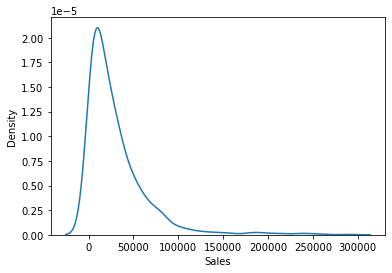

In [32]:
# distribution of sales
sns.kdeplot(data=df,x=df['Sales'])

The Sales column is skewed to the right due to seasonalities we will account for seasonality through seasonal decomposition

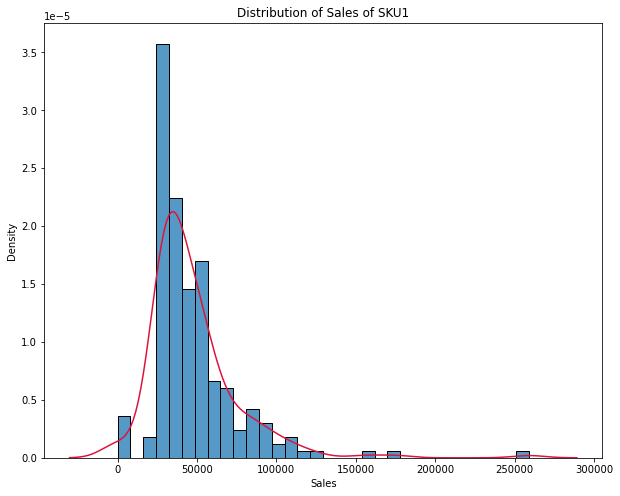

In [57]:
# distribution of sales of product SKU1
fig,ax=plt.subplots(figsize=(10,8))
ax=sns.histplot(data = df,x=(df['Sales'].loc[df['Product']=='SKU1']),kde=False,stat='density')
sns.kdeplot(data=df,x=(df['Sales'].loc[df['Product']=='SKU1']),ax=ax,color='crimson')
plt.title('Distribution of Sales of SKU1')
plt.show()

In [58]:
def distribute_product(product):
    """Creating a function to come up with the distribution
    for the products"""
    fig,ax=plt.subplots(figsize=(10,8))
    ax=sns.histplot(data=df,x=df['Sales'].loc[df['Product']==product],stat='density')
    sns.kdeplot(data=df,x=df['Sales'].loc[df['Product']==product],color='crimson',ax=ax)
    plt.title(f'Distribution of Sales of {product}')
    plt.show()

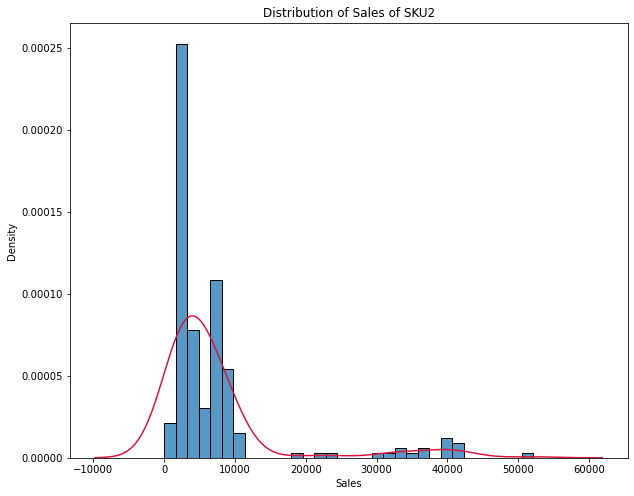

In [59]:
# plotting the distribution of sales of product SKU2
distribute_product('SKU2')

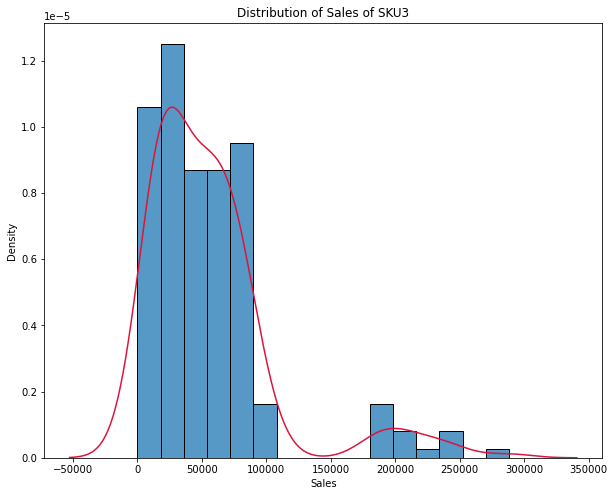

In [60]:
# plotting the distribution of Sales for product SKU3
distribute_product('SKU3')

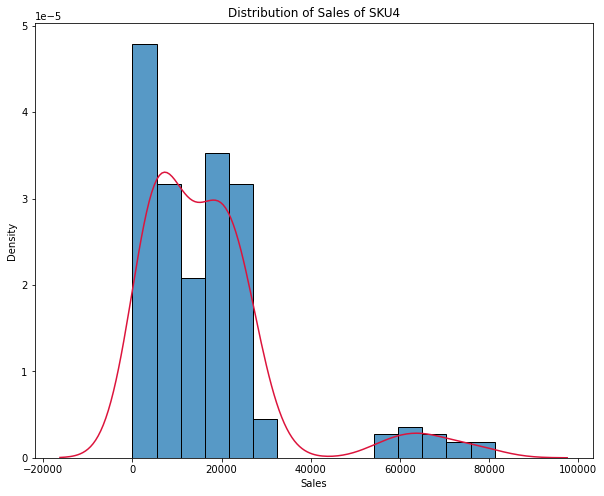

In [61]:
distribute_product('SKU4')

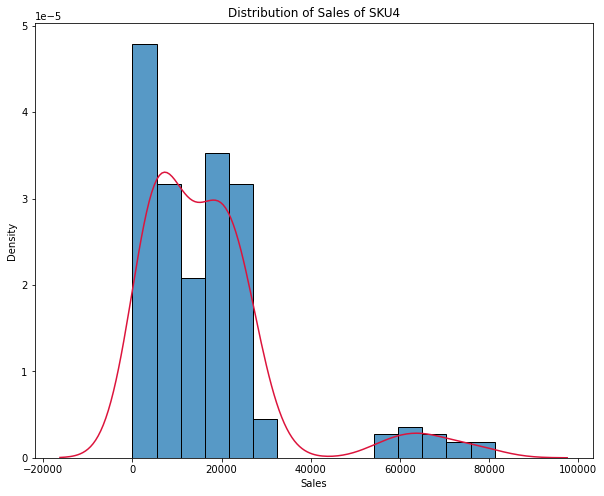

In [62]:
distribute_product('SKU4')

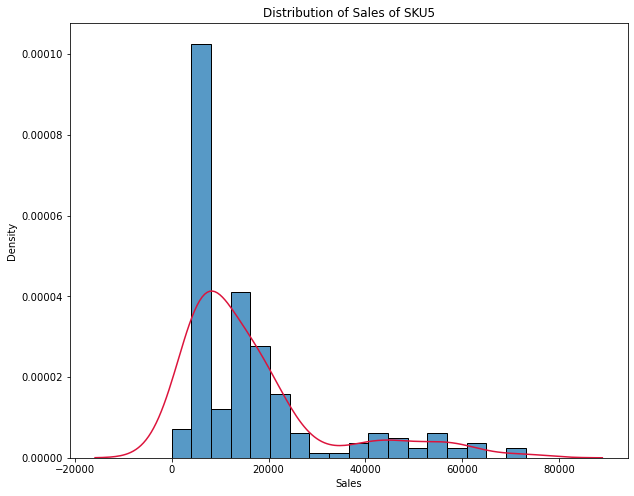

In [63]:
distribute_product('SKU5')

The data is skewed to right

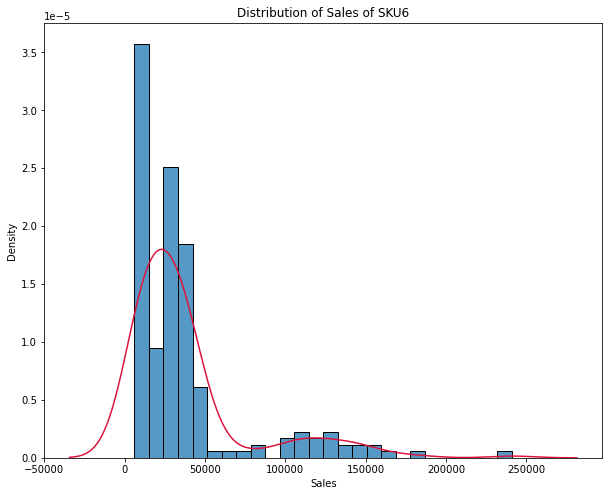

In [64]:
distribute_product('SKU6')

The data is skewed to the right

Text(0.5, 0, 'Years')

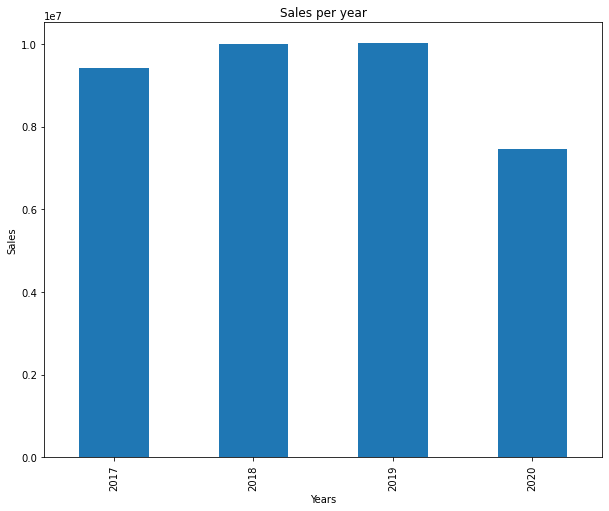

In [73]:
# lets create a barplot for the total sales per year
fig,ax=plt.subplots(figsize=(10,8))
ax=df.groupby('year')['Sales'].sum().plot(kind='bar')
ax.set_title('Sales per year')
ax.set_ylabel('Sales')
ax.set_xlabel('Years')

In [86]:
# lets create a barplot for total sales per product per year
new_data=df.groupby(['year','Product'])['Sales'].sum()

ValueError: Could not interpret input 'year'

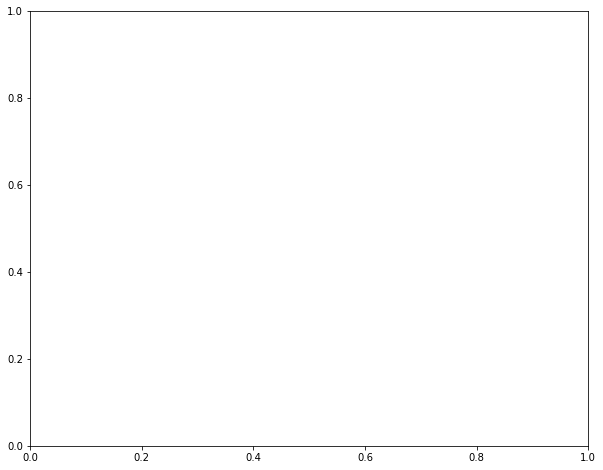

In [87]:
# creating a barplot for total sales per product per year
fig,ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(data=new_data, y='Sales',x='year',hue='Product')
ax.set_title('Sales of products per year')

plt.show()